In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')

Display Top 5 rows of the dataset

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Check Last 5 Rows of the dataset

In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Find Shape of our dataset(number of rows and number of columns)

In [5]:
data.shape

(200, 5)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 200
Number of Columns 5


Get Information About our dataset like total number rows ,total number of columns,datatypes of each column and memory required

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Check Null Values in the dataset

In [9]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Get overall statistics about the dataset

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Kmeans Clustering


In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
X=data[['Annual Income (k$)','Spending Score (1-100)']]

In [15]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
from sklearn.cluster import KMeans

In [18]:
k_means=KMeans()
k_means.fit(X)

KMeans()

In [19]:
k_means=KMeans(n_clusters=5)
k_means.fit_predict(X)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 6, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 1, 6, 6, 6, 6,
       6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 7, 1, 4, 5, 7, 5, 7,
       1, 7, 5, 4, 5, 7, 5, 7, 5, 4, 1, 4, 5, 4, 1, 7, 5, 4, 5, 4, 5, 7,
       5, 4, 5, 7, 5, 7, 1, 4, 5, 4, 5, 7, 5, 4, 5, 7, 5, 7, 5, 4, 5, 4,
       5, 7, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2], dtype=int32)

Elbow Method to find Optimal Number of Clusters

In [21]:
wcss=[]
for i in range(1,11):
  k_means= KMeans(n_clusters=i)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

In [22]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 68112.71591361181,
 40825.16946386947,
 35596.818591776435,
 31828.878227770245,
 27320.01862984687,
 21329.940496726762]

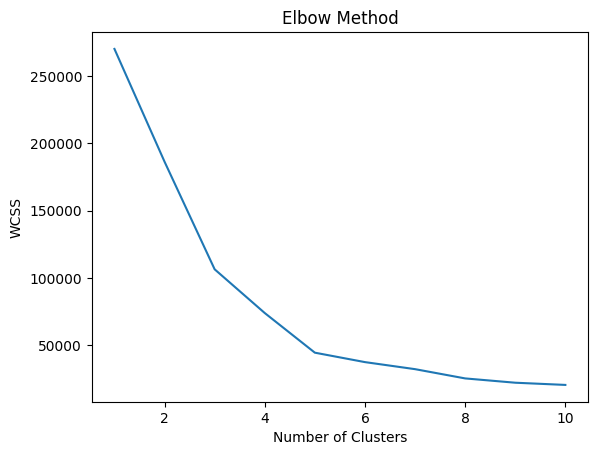

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):  # Extend the range to 20
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Model Training

In [33]:
X=data[['Annual Income (k$)','Spending Score (1-100)']]

In [34]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [36]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

In [37]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

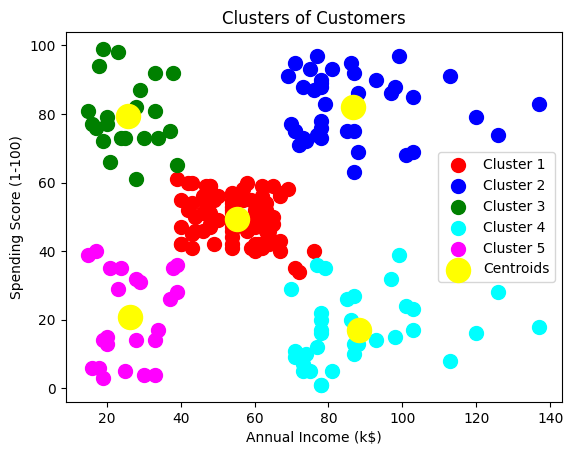

In [39]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='blue',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='cyan',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='magenta',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [40]:
k_means.predict([[15,39]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

Save the model

In [42]:
import joblib

In [43]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [44]:
model = joblib.load("customer_segmentation")

In [45]:
model.predict([[15,39]])

array([4], dtype=int32)

GUI

In [8]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler # import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset (replace 'your_dataset.csv' with the actual path)
data = pd.read_csv('/content/Mall_Customers.csv')  # Assuming this is your data loading step

# Define X with the features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']] # Define X here

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform
X_scaled = scaler.fit_transform(X)

# Now, fit your KMeans model to the scaled data
k_means = KMeans(n_clusters=5, random_state=42)
y_means = k_means.fit_predict(X_scaled)

# Save your scaler object
joblib.dump(scaler, 'scaler.pkl')

# Save the model
joblib.dump(k_means, "customer_segmentation")

#Load the model and scaler
model = joblib.load('customer_segmentation')
scaler = joblib.load('scaler.pkl')

st.title("Customer Segmentation")

income = st.slider("Annual Income (k$)", 0, 150, 50)
score = st.slider("Spending Score (1-100)", 1, 100, 50)

if st.button("Predict"):
    # Create a feature vector with the input values
    features = np.array([[income, score]])

    # Scale the feature vector using the loaded scaler
    features_scaled = scaler.transform(features)

    # Predict the cluster for the scaled features
    cluster = model.predict(features_scaled)[0]

    st.write(f"### This customer belongs to cluster: {cluster}")

2025-05-06 10:11:49.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 10:11:49.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 10:11:49.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 10:11:49.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 10:11:49.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 10:11:49.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 10:11:49.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 10:11:49.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [11]:
from ipywidgets import interact
import joblib
import numpy as np

# Load model
model = joblib.load('customer_segmentation') # Changed filename here
scaler = joblib.load('scaler.pkl') # Changed filename here

def predict_cluster(income, score):
    features = np.array([[income, score]])
    scaled = scaler.transform(features)
    cluster = model.predict(scaled)[0]
    print(f"This customer belongs to cluster: {cluster}")

interact(predict_cluster, income=(0,150), score=(1,100));

interactive(children=(IntSlider(value=75, description='income', max=150), IntSlider(value=50, description='sco…